In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('matplotlibrc')

In [101]:
envs.keys()

dict_keys(['hopper', 'halfcheetah', 'walker', 'can', 'lift', 'square'])

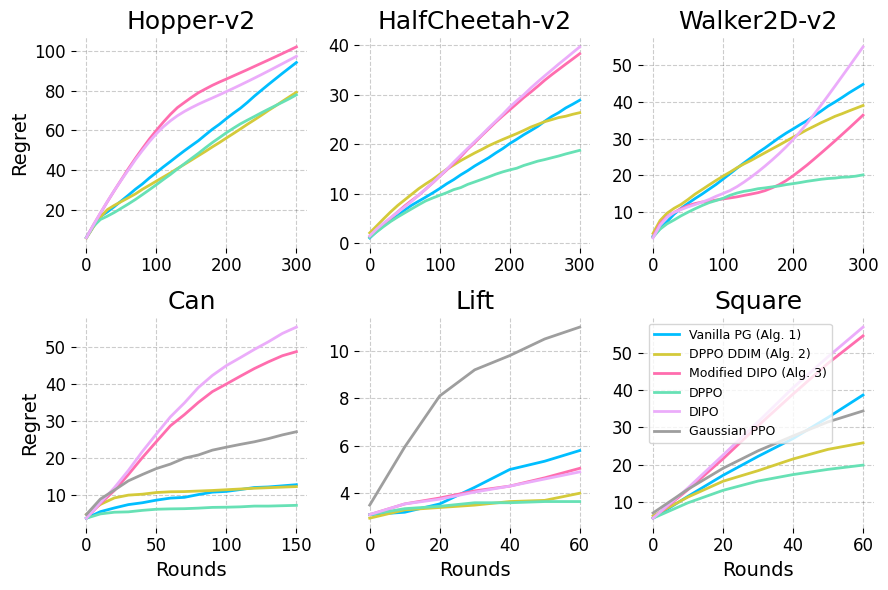

In [22]:
algorithms = {'vpg' : 'Vanilla PG (Alg. 1)', 'ppo_ddim' : 
              'DPPO DDIM (Alg. 2)', 'clone': 'Modified DIPO (Alg. 3)', 
            'ppo_diffusion': 'DPPO', 'dipo' : 'DIPO', 'gaussian' : 'Gaussian PPO'}
v_max = {'hopper' : 3500, 'halfcheetah' : 5000, 'walker' : 4000, 'can' : 1, 'lift' : 1, 'square' : 1}
t_max = {'hopper': 300, 'halfcheetah' : 300, 'walker' : 300, 'can' : 150, 'lift' : 60, 'square' : 60}
envs = {'hopper' : 'Hopper-v2', 'halfcheetah' : 'HalfCheetah-v2', 'walker' : 'Walker2D-v2', 
       'can' : 'Can', 'lift' : 'Lift', 'square' : 'Square'}


regrets = pd.DataFrame(index=envs.values(), columns=algorithms.values())

fig, ax = plt.subplots(figsize=(9,6), nrows=2, ncols=3)
for idx, env_name in enumerate(envs.keys()):
    i = idx // 3 ; j = idx % 3
    data = pd.read_csv('data/'+env_name+'_eval.csv', index_col=0).T.drop_duplicates().T
    for alg_name in algorithms.keys():
        try:
            regret = (10*(v_max[env_name] - data.loc[:t_max[env_name],
             data.columns.str.contains(alg_name)])/v_max[env_name]).cumsum().mean(1)
            ax[i, j].plot(regret, label=algorithms[alg_name])
            regrets.loc[envs[env_name], algorithms[alg_name]] = regret.iloc[-1]
        except Exception as e:
            print(e, env_name, alg_name)
            continue
    ax[i, j].set_title(envs[env_name])
    if i == 1:
        ax[i, j].set_xlabel('Rounds')
    if j == 0:
        ax[i, j].set_ylabel('Regret')
ax[i, j].legend(fontsize=9)
plt.tight_layout()
plt.savefig('../imgs/regret.png', dpi=300)

In [181]:
regrets.rank(axis=1).mean().round(2).sort_values()

DPPO                      1.00
DPPO DDIM (Alg. 2)        2.17
Vanilla PG (Alg. 1)       3.67
Modified DIPO (Alg. 3)    4.17
Gaussian PPO              4.33
DIPO                      4.83
dtype: float64

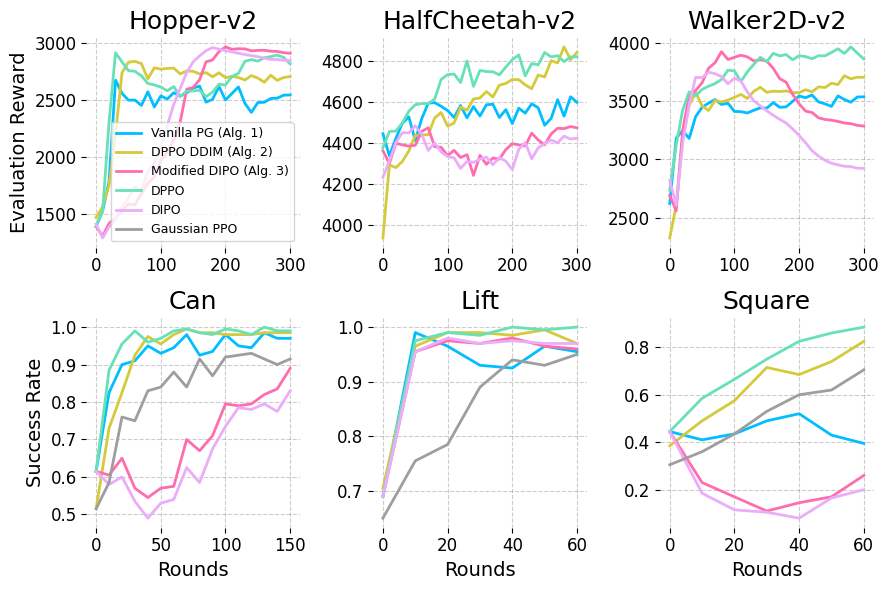

In [23]:

values = pd.DataFrame(index=envs.values(), columns=algorithms.values())
fig, ax = plt.subplots(figsize=(9,6), nrows=2, ncols=3)
for idx, env_name in enumerate(envs.keys()):
    i = idx // 3 ; j = idx % 3
    data = pd.read_csv('data/'+env_name+'_eval.csv', index_col=0).T.drop_duplicates().T
    for alg_name in algorithms.keys():
        try:
            value = data.loc[:t_max[env_name], data.columns.str.contains(alg_name)].mean(1)
            ax[i,j].plot(value, label=algorithms[alg_name])
            values.loc[envs[env_name], algorithms[alg_name]] = value.max()
        except Exception as e:
            print(e, alg_name, env_name)
            continue
    ax[i, j].set_title(envs[env_name])
    if i == 1:
        ax[i, j].set_xlabel('Rounds')
    if j == 0 and i == 0:
        ax[i, j].set_ylabel('Evaluation Reward')
    if j == 0 and i == 1:
        ax[i, j].set_ylabel('Success Rate')
ax[0, 0].legend(fontsize=9)
plt.tight_layout()
plt.savefig('../imgs/reward.png', dpi=300)


In [5]:
values.rank(axis=1, ascending=False).mean().round(2).sort_values()

DPPO                      1.50
DPPO DDIM (Alg. 2)        2.50
Vanilla PG (Alg. 1)       3.83
Modified DIPO (Alg. 3)    3.83
DIPO                      4.17
Gaussian PPO              4.33
dtype: float64

In [6]:
values.rank(axis=1, ascending=False)

,Vanilla PG (Alg. 1),DPPO DDIM (Alg. 2),Modified DIPO (Alg. 3),DPPO,DIPO,Gaussian PPO
Hopper-v2,5.0,4.0,1.0,3.0,2.0,NaN
HalfCheetah-v2,3.0,1.0,5.0,2.0,4.0,NaN
Walker2D-v2,5.0,4.0,2.0,1.0,3.0,NaN
Can,3.0,2.0,5.0,1.0,6.0,4.0
Lift,3.0,2.0,4.5,1.0,4.5,6.0
Square,4.0,2.0,5.5,1.0,5.5,3.0


In [19]:
regrets.fillna(0.0).round(3).div([300,300,300,150,60,60], axis=0).round(2)

/tmp/ipykernel_2990/2718881137.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  regrets.fillna(0.0).round(3).div([300,300,300,150,60,60], axis=0).round(2)


,Vanilla PG (Alg. 1),DPPO DDIM (Alg. 2),Modified DIPO (Alg. 3),DPPO,DIPO,Gaussian PPO
Hopper-v2,0.31,0.26,0.34,0.26,0.32,0.00
HalfCheetah-v2,0.10,0.09,0.13,0.06,0.13,0.00
Walker2D-v2,0.15,0.13,0.12,0.07,0.18,0.00
Can,0.09,0.08,0.32,0.05,0.37,0.18
Lift,0.10,0.07,0.08,0.06,0.08,0.18
Square,0.65,0.43,0.91,0.33,0.95,0.57


In [16]:
values.fillna(0.0).round(3)

/tmp/ipykernel_2990/2974752587.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values.fillna(0.0).round(3)


,Vanilla PG (Alg. 1),DPPO DDIM (Alg. 2),Modified DIPO (Alg. 3),DPPO,DIPO,Gaussian PPO
Hopper-v2,2673.840,2838.749,2966.281,2914.717,2959.974,0.000
HalfCheetah-v2,4623.222,4866.377,4478.041,4839.046,4482.236,0.000
Walker2D-v2,3552.988,3718.022,3924.898,3966.022,3749.331,0.000
Can,0.985,0.995,0.890,1.000,0.830,0.930
Lift,0.990,0.995,0.980,1.000,0.980,0.950
Square,0.520,0.825,0.445,0.885,0.445,0.705
